## This code produces Figure 2 in the paper.

In [5]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')
from utils import datasets
import utils.resnet_cond as resnet

In [2]:
# Storage directory for maps.
storage_dir = Path("/n/netscratch/dvorkin_lab/Lab/aakhmetzhanova/evidence-estimation-Astrid/") 

# Map configurations.
suites    = ['IllustrisTNG', 'Astrid', 'SIMBA',]
splits   = 15
index = 10

maps_plot_Mgas = []
maps_plot_Mtot = []

# Load maps (Mtot and Mgas) to plot.
for suite in suites:
    
    maps_Mtot     = np.load(storage_dir / f'data/2D/Maps_Mtot_{suite}_CV_z=0.00.npy')[index*splits]
    maps_plot_Mtot.append(np.log10(maps_Mtot)[None, ...])
    
    maps_Mgas     = np.load(storage_dir / f'data/2D/Maps_Mgas_{suite}_CV_z=0.00.npy')[index*splits]
    maps_plot_Mgas.append(np.log10(maps_Mgas)[None, ...])


maps_plot_Mgas = np.concatenate(maps_plot_Mgas)
maps_plot_Mtot = np.concatenate(maps_plot_Mtot)
maps_plot = [maps_plot_Mtot, maps_plot_Mgas]

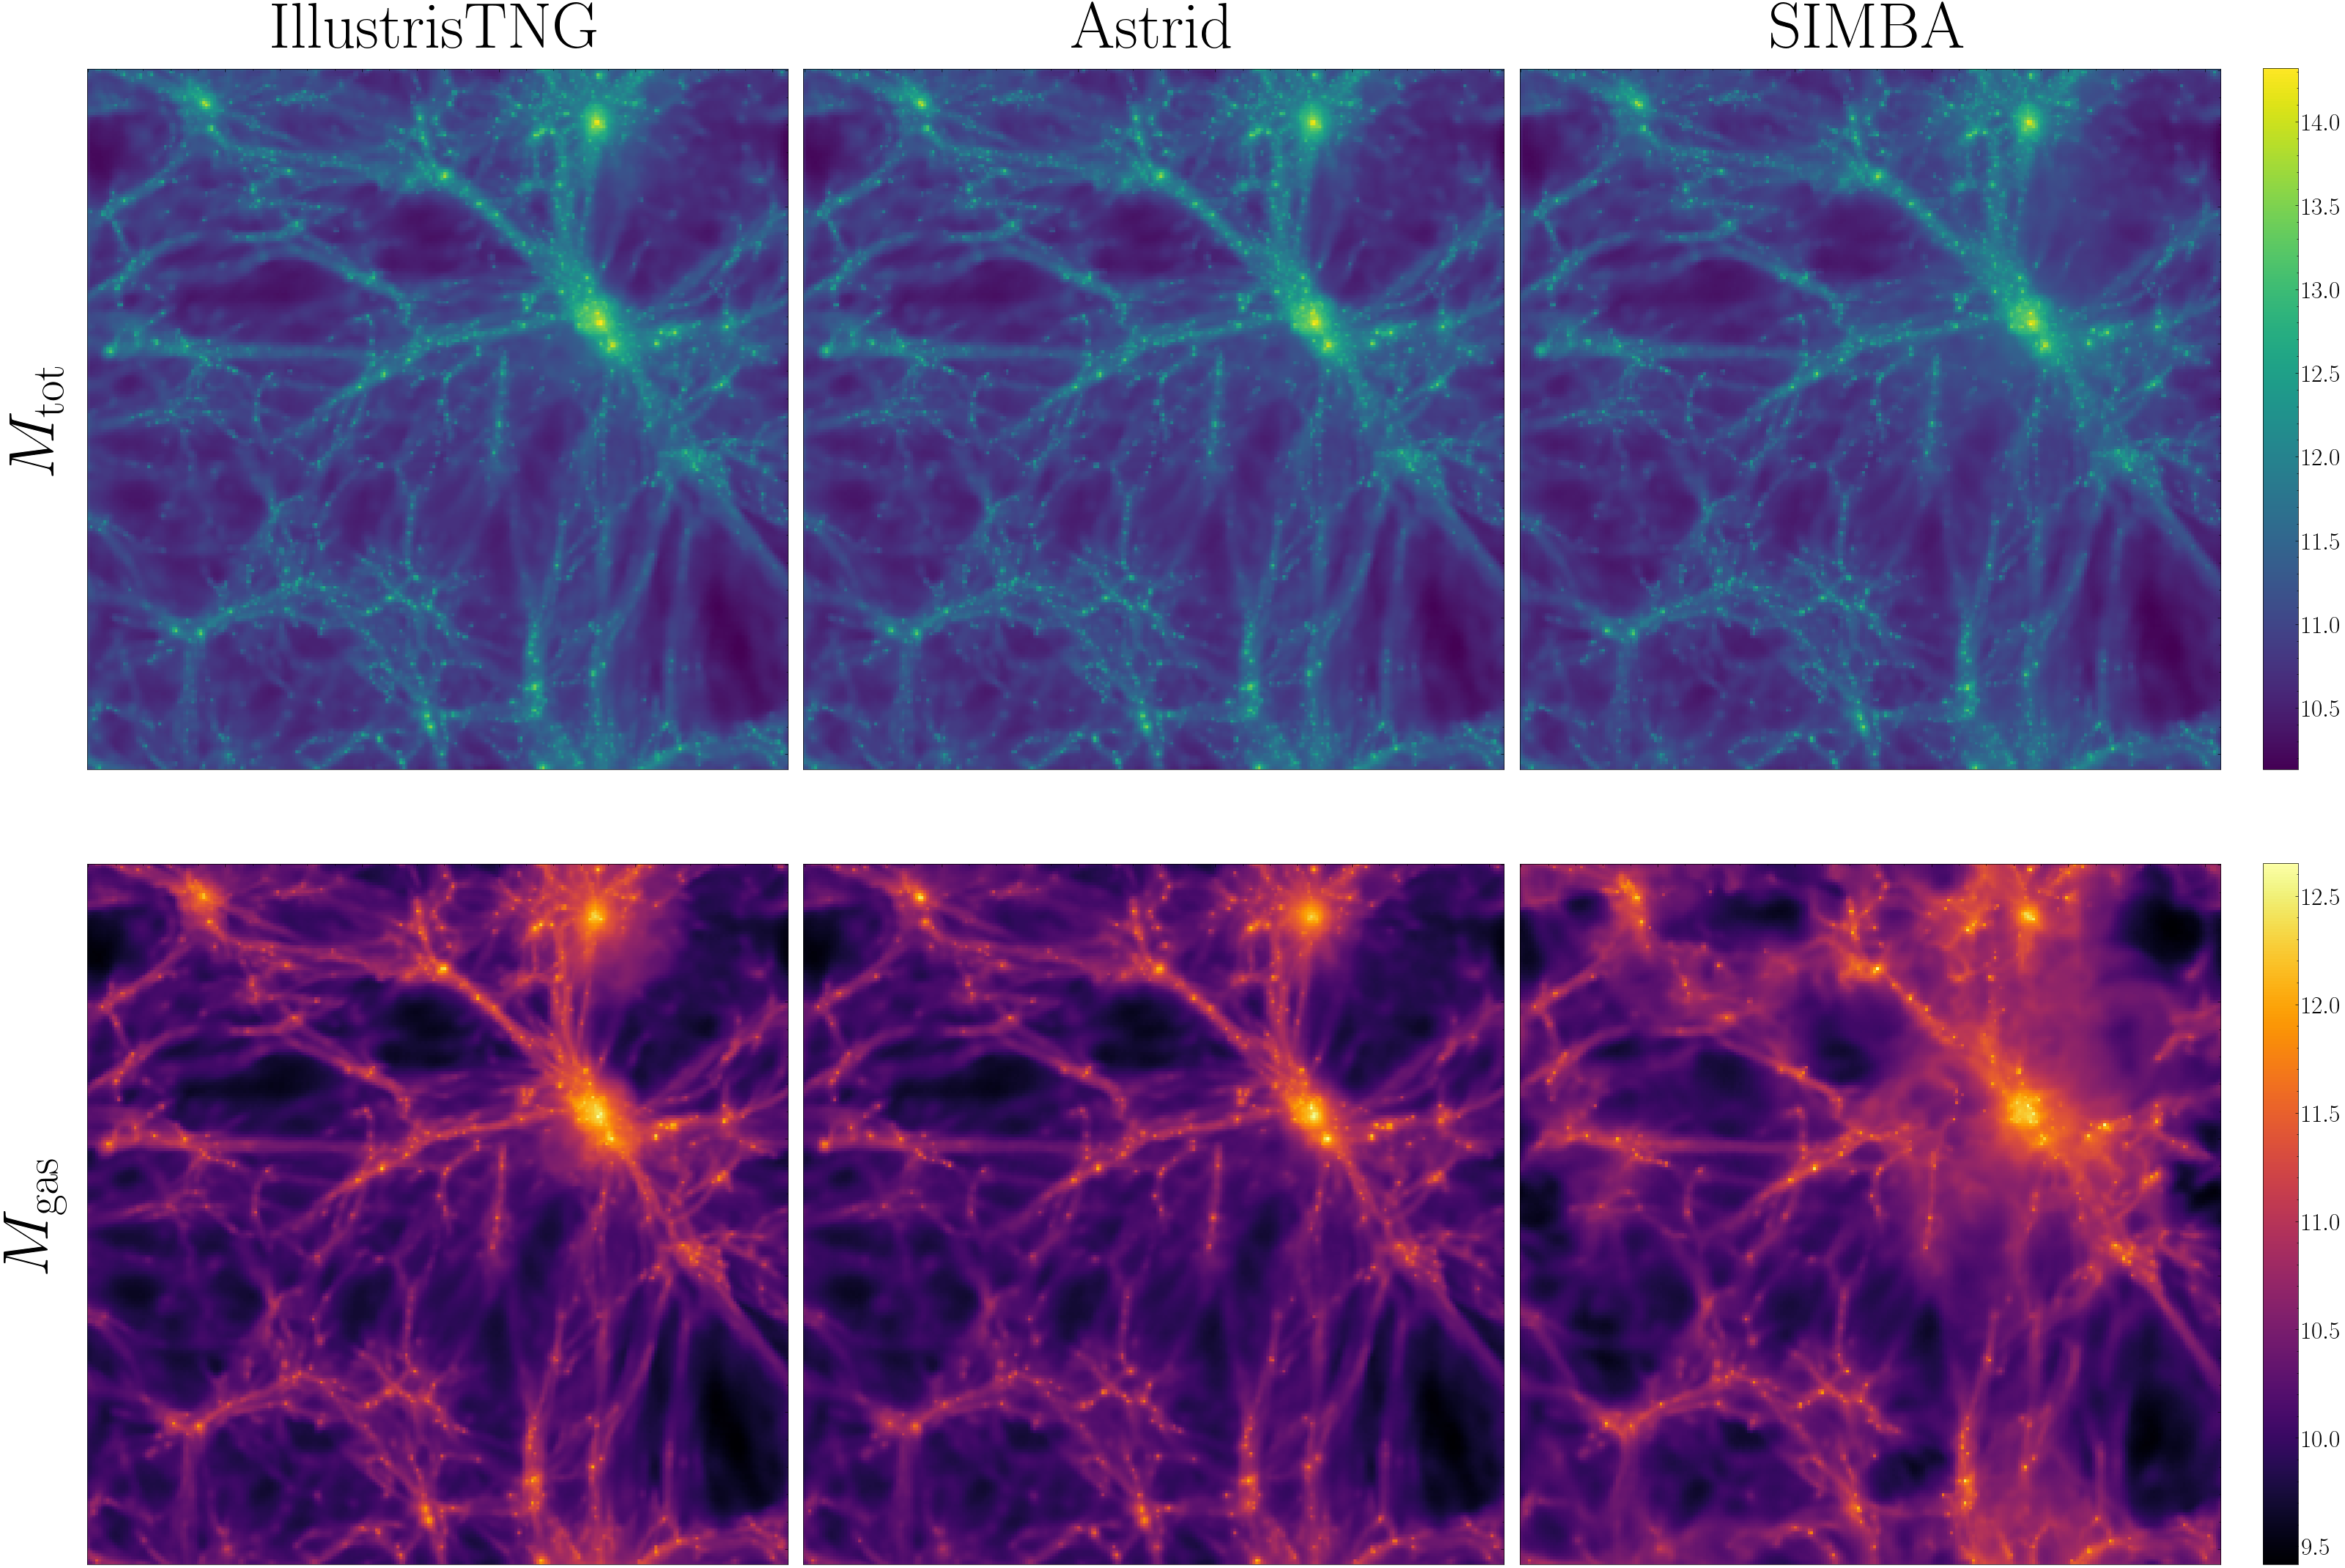

In [9]:
# Plot maps
cmaps = ['viridis', 'inferno']
field_labels = [r'$M_{\mathrm{tot}}$', r'$M_{\mathrm{gas}}$']

fig, axs = plt.subplots(2, 3, figsize=(32, 22), layout='constrained')
for row in range(axs.shape[0]): 
    for col in range(axs.shape[1]):   
        ax = axs[row, col]
        pcm = ax.imshow(maps_plot[row][col], cmap = cmaps[row])
        
        ax.set_aspect('equal')
        ax.tick_params(axis='both', which='both',      
                       labelbottom=False, bottom=False,  
                       left=False, labelleft=False, ) 
        
        if col == 0:
            ax.set_ylabel(
                field_labels[row], fontsize=64, labelpad=20, 
            )
        if row == 0:
            ax.set_xlabel(suites[col], fontsize=64, labelpad=20,)
            ax.xaxis.set_label_position('top')
            
    cbar = fig.colorbar(pcm, ax=axs[row, :], shrink=0.9, pad=0.02,) #fontsize=64)
    cbar.ax.tick_params(labelsize=24)

fig.savefig('plots/1_astro_fields.pdf')
